In [1]:
from mnist import MNIST
import numpy as np
def load_dataset():
    mndata = MNIST("./data/python-mnist/data/")
    
    X_train, labels_train = map(np.array, mndata.load_training())
    kept_entries_pos1 = (labels_train == 2) + (labels_train == 7)
    X_train = X_train[kept_entries_pos1]
    labels_train = labels_train[kept_entries_pos1]
    labels_train = labels_train.astype(int)
    labels_train[labels_train == 7] = 1
    labels_train[labels_train == 2] = -1

    
    
    X_test, labels_test = map(np.array, mndata.load_testing())
    kept_entries_pos2 = (labels_test == 2) + (labels_test == 7)
    X_test = X_test[kept_entries_pos2]
    labels_test = labels_test[kept_entries_pos2]
    labels_test = labels_test.astype(int)
    labels_test[labels_test == 7] = 1
    labels_test[labels_test == 2] = -1
    # normalization to [0,1]
    X_train = X_train/255.0  
    X_test = X_test/255.0
    return X_train, labels_train, X_test, labels_test
X_train, labels_train, X_test, labels_test = load_dataset()

In [2]:
def SGD(X_train, labels_train, X_test, labels_test, batch_size = 100, learning_rate = 0.001, stop_b = 1e-4, stop_w= 1e-4):

    ##### import math
    n, d= X_train.shape

    m = X_test.shape[0]

    # w = np.zeros(d)
    new_w = np.zeros(d)
    w_gradient = np.zeros(d)
    # b = 0
    new_b = 0
    b_gradient = 0
#     learning_rate = 0.001

    reg_lambda = 1 
    reg_lambda = reg_lambda * (batch_size/n)
    loss_on_training = []
    loss_on_testing = []

    loss_sum = 0

    misclass_on_training = []
    misclass_on_testing = []



    # TODO: while not converge
    count = 0
    metStopCondition  = False
#     batch_size = 1
    while not metStopCondition:

        w = np.copy(new_w)
        b = np.copy(new_b)

        idx = np.random.randint(0, n, batch_size)
        X_train_batch = X_train[idx]
        labels_train_batch = labels_train[idx]

        y_pred = b + X_train_batch.dot(w)
        u = 1/(1+ np.exp(-labels_train_batch*(y_pred)))
        w_gradient = (1/batch_size)*np.sum((1-u)*(-labels_train_batch*X_train_batch.T), axis = 1) + 2*reg_lambda*w

        b_gradient = (1/batch_size)*np.sum((1-u)*(-labels_train_batch))

        # gradient descent update on the whole dataset, therefore we don't have to update each step
        new_w  -= w_gradient * learning_rate
        new_b  -= b_gradient * learning_rate

        training_loss = (1/n) * np.sum( np.log(1+ np.exp(-labels_train*(b+X_train.dot(w)) )) + reg_lambda * np.linalg.norm(w, 2))
        loss_on_training.append(training_loss)
        testing_loss = (1/m) * np.sum( np.log(1+ np.exp(-labels_test*(b+X_test.dot(w)) )) + reg_lambda * np.linalg.norm(w, 2))
        loss_on_testing.append(testing_loss)

        num_incor_class_training = np.sum( labels_train !=( np.sign(b+ X_train.dot(w) ) ) ) 
        num_incor_class_testing  = np.sum( labels_test != ( np.sign(b +  X_test.dot(w) ) ))
#         print("num_incor_class_training: ", num_incor_class_training)
        misclass_on_training.append(  num_incor_class_training /n    )
        misclass_on_testing.append(num_incor_class_testing/m)
    #     print(new_w)
    #     print(w)
    #     break
    #     print("new_b - b: ", type(new_b - b))
        # Stop condition check
        # 1e-7 2.5e-7
        metStopCondition = np.absolute(new_b - b) < stop_b and np.linalg.norm(new_w - w, 2) < stop_w
#         print("new_b - b", new_b - b)
#         print("np.linalg.norm(new_w - w, 2) ", np.linalg.norm(new_w - w, 2) )
#         print("loss: ", loss_on_training[-1])
    return loss_on_training, loss_on_testing, misclass_on_training, misclass_on_testing

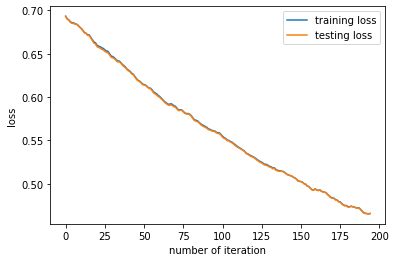

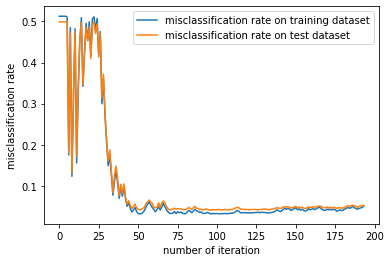

In [3]:
loss_on_training1, loss_on_testing1, misclass_on_training1, misclass_on_testing1 \
    = SGD(X_train, labels_train, X_test, labels_test, batch_size = 1,stop_b =6e-4 , stop_w = 2.5e-3)

from matplotlib import pyplot as plt

plt.plot(range(len(loss_on_training1)), loss_on_training1, label = "training loss")
plt.plot(range(len(loss_on_training1)), loss_on_testing1,label = "testing loss")
plt.xlabel("number of iteration")
plt.ylabel("loss")
plt.legend()
# plt.show()
plt.savefig("A6c(i)")
plt.show()

plt.plot(range( len(misclass_on_training1)-1), misclass_on_training1[1:], label = "misclassification rate on training dataset")
plt.plot(range(len(misclass_on_training1)-1), misclass_on_testing1[1:], label = "misclassification rate on test dataset")
plt.xlabel("number of iteration")
plt.ylabel("misclassification rate")
plt.legend()
plt.savefig("A6c(ii)")
plt.show()

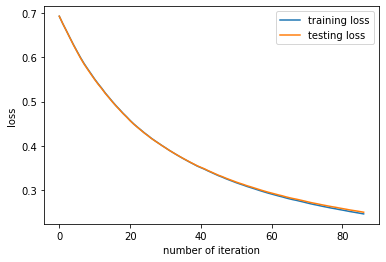

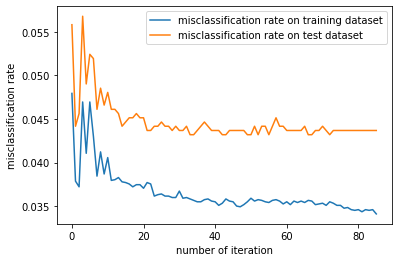

In [4]:
loss_on_training2, loss_on_testing2, misclass_on_training2, misclass_on_testing2 \
    = SGD(X_train, labels_train, X_test, labels_test, batch_size = 100, learning_rate = 0.01,stop_b =1e-4 , stop_w = 4e-3)

plt.plot(range(len(loss_on_training2)), loss_on_training2, label = "training loss")
plt.plot(range(len(loss_on_training2)), loss_on_testing2,label = "testing loss")
plt.xlabel("number of iteration")
plt.ylabel("loss")
plt.legend()
# plt.show()
plt.savefig("A6d(i)")
plt.show()

plt.plot(range( len(misclass_on_training2)-1), misclass_on_training2[1:], label = "misclassification rate on training dataset")
plt.plot(range(len(misclass_on_training2)-1), misclass_on_testing2[1:], label = "misclassification rate on test dataset")
plt.xlabel("number of iteration")
plt.ylabel("misclassification rate")
plt.legend()
plt.savefig("A6d(ii)")
plt.show()
